# test_project_zeta
### reconstruct SSH from modal decomposition

* Incremental: add up modes from 0 to Nmodes, compute error for each
* one single time step
* zeta is taken from pressure at the surface

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset

In [11]:
filepath = "/data0/project/vortex/lahaye/luckym2_modemap/luckym2_modemap.nc"
filtser = "/data0/project/vortex/lahaye/luckym2_tseries/luckym2_tseries_2Dvars.nc"
it = 200

In [12]:
nc = Dataset(filepath,"r")
pamp = nc.variables['p_amp'][it,...]
pmod = nc.variables['p_modes'][:,-1,...]
lon = nc.variables['lon_rho'][:]
lat = nc.variables['lat_rho'][:]
topo = nc.variables['topo'][:]
time = nc.variables['time'][it]
otime = nc.variables['ocean_time'][it]
nc.close()

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


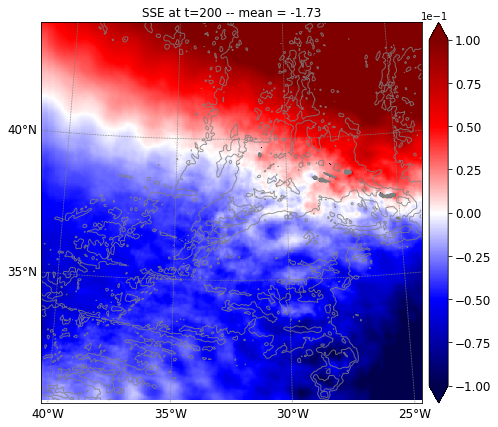

In [29]:
toplot = (pamp*pmod).sum(axis=0)
 
hmoy = np.nanmean(toplot)
toplot -= hmoy

# plot prep
valmin = -1.25
valmax = 1.25

fs       = 12
proj     = 'lcc'
res      = 'i'
stride   = 5
Lx,Ly    = 1500e3,1500e3 # extend in m
cmap = plt.get_cmap('seismic')
zlevs=[0,2000,3500]
grdcol = "grey"

fig = plt.figure(figsize=(8,7))
ax = plt.gca()
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=1,alpha=0.8)
for item in hct.collections:
    item.set_rasterized(True)

##### plot the data
hpc = bm.pcolormesh(xx,yy,toplot,vmin=valmin,vmax=valmax,cmap=cmap)
hcb = bm.colorbar(hpc,extend='both')

hcb.formatter.set_powerlimits((-1, 1))    
hcb.update_ticks()
hcb.ax.tick_params(labelsize=fs)

plt.title('SSE at t={0} -- mean = {1:.2f}'.format(int(otime),hmoy))

hpc.set_array(toplot[:-1,:-1].ravel()/10)
hpc.set_clim(np.array([-1,1])*2*toplot.std()/10)

In [30]:
toplot.std()

nan